4 capas 64 32 16 
learnin reate =0.3
epoch = 9

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

In [2]:
from tensorflow.keras.datasets import mnist

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape: (60000,)
y_test shape:  (10000,)


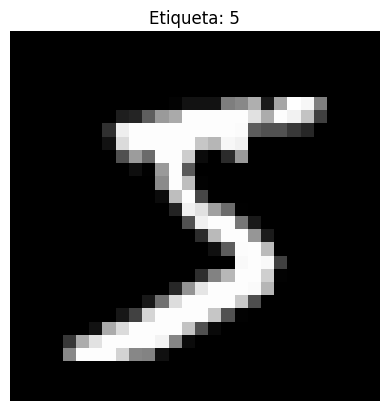

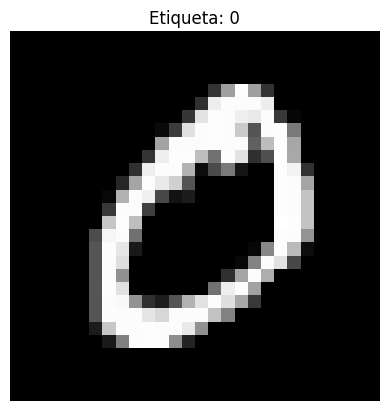

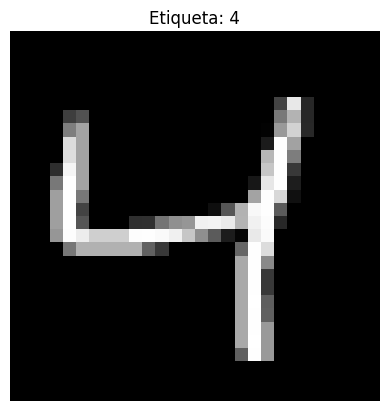

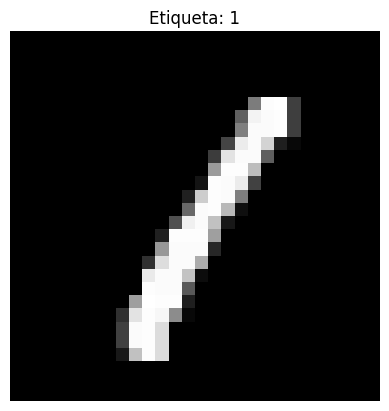

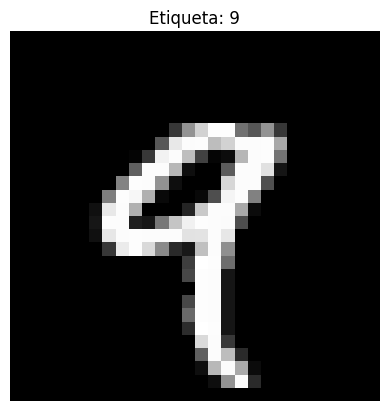

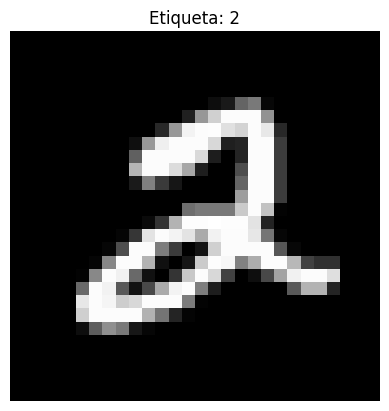

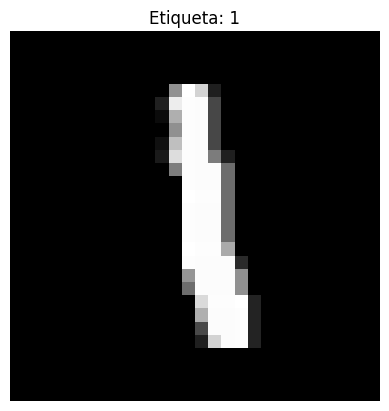

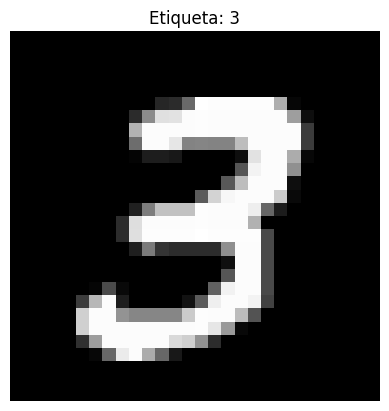

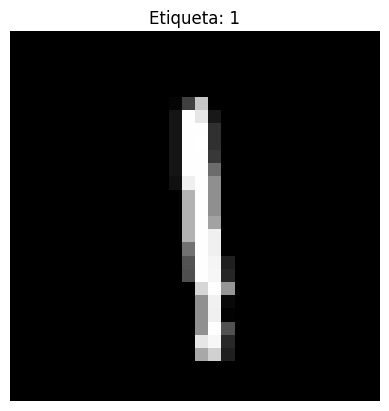

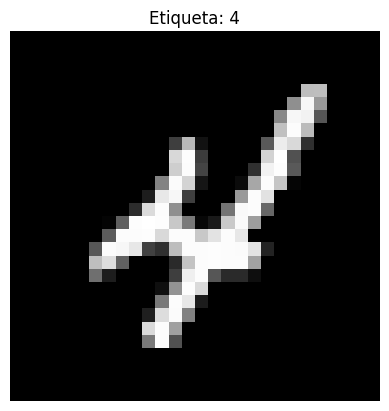

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
    plt.show()

In [4]:
X_train = X_train / 255.0
X_test  = X_test  / 255.0

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

mi_modelo = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='linear')  # 10 clases (dígitos 0-9)
])

mi_modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
perdida = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
mi_modelo.compile(
    optimizer=optimizer,
    loss=perdida,
    metrics=['accuracy']
)

In [11]:
mi_modelo.fit(
    X_train, y_train,
    epochs=9,
    validation_data=(X_test, y_test)
)

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1024 - loss: 4.1174 - val_accuracy: 0.0982 - val_loss: 2.3412
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1028 - loss: 2.3384 - val_accuracy: 0.1032 - val_loss: 2.3636
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1055 - loss: 2.3389 - val_accuracy: 0.1010 - val_loss: 2.3298
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1008 - loss: 2.3376 - val_accuracy: 0.0980 - val_loss: 2.3420
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1051 - loss: 2.3370 - val_accuracy: 0.1010 - val_loss: 2.3250
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1033 - loss: 2.3369 - val_accuracy: 0.0982 - val_loss: 2.3172
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1010 - loss: 2.3356 - val_accuracy: 0.1032 - val_loss: 2.3223
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1022 - loss: 2.3348 - val_acc

In [13]:
mi_modelo.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.3167


[2.318161964416504, 0.11349999904632568]

In [14]:
mi_model.summary()

NameError: name 'mi_model' is not defined